In [1]:
from sklearn.impute import KNNImputer
import plotly.express as px
import pandas as pd
import missingno as msno

### Import CSV file

In [2]:
df = pd.read_csv('rhs_plant_database.csv')

In [3]:
pd.set_option('display.max_columns', 85)
pd.set_option('display.max_rows', 85)

### Clean data

In [4]:
# Renaming unnamed column to ID
df.rename(columns={'Unnamed: 0':'ID'}, inplace=True )
df['Family'] = df['Family'].str.replace('Family\n','')
df['Genus'] = df['Genus'].str.replace('Genus\n','')
df['PlantRange'] = df['PlantRange'].str.replace('Plant range\n','')
df['Foliage'] = df['Foliage'].str.replace('Foliage\n','')
df['Habit'] = df['Habit'].str.replace('Habit\n','')
df['Hardiness'] = df['Hardiness'].str.replace('Fragrance\n','')
df['Hardiness'] = df['Hardiness'].str.replace('Toxicity\n','')
df['Cultivation'] = df['Cultivation'].str.replace('Cultivation\n', '')
df['Propagation'] = df['Propagation'].str.replace('Propagation\n', '')
df['SuggestedPlantingLocation'] = df['SuggestedPlantingLocation'].str.replace('Suggested planting locations and garden types\n', '')
df['Pruning'] = df['Pruning'].str.replace('Pruning\n', '')
df['Pests'] = df['Pests'].str.replace('Pests\n', '')
df['Diseases'] = df['Diseases'].str.replace('Diseases\n', '')
df['Exposure'] = df['Exposure'].str.replace('Exposure\n', '')
df['Aspect'] = df['Aspect'].str.replace('Aspect\n', '')
df['Sunlight'] = df['Sunlight'].str.replace('\n', '')
df['Soil'] = df['Soil'].str.replace('\n', '').str.replace('ClayLoamSand', 'Clay, Loam, Sand').str.replace('ChalkLoamSand', 'Chalk, Loam, Sand')
df['Moisture'] = df['Soil'].str.replace('Moisture\n', '').str.replace('ClayLoamSand', 'Clay, Loam, Sand').str.replace('ChalkLoamSand', 'Chalk, Loam, Sand')
df['pH'] = df['pH'].str.replace('pH\n', '')
df['UltimateHeight'] = df['UltimateHeight'].str.replace('Ultimate height\n', '')
df['UltimateSpread'] = df['UltimateSpread'].str.replace('Ultimate spread\n', '')
df['TimeToUltimateHeight'] = df['TimeToUltimateHeight'].str.replace('Time to ultimate height', '').str.replace('\n', '')
df['TimeToUltimateHeight'] = df['TimeToUltimateHeight'].str.replace('Time to ultimate height\n', '')

### Convert string to numerical units (metres)

In [5]:
# Get Ulimate Height min and max values 
def getUHMin(s):
    if s == "Higher than 12 metres":
        return '12'
    else:
        if '-' in s:
            s = s.split('-', 1)[0]
            return s
def getUHMax(s):
    if s == "Up to 10 cm":
        return '10'
    else:
        if '-' in s:
            s = s.split('-', 1)[1]
            return s
# Get Ultimate Spread min and max values
def getUSMin(s):
    if s == "wider than 8 metres":
        return '8'
    else:
        if '-' in s:
            s = s.split('-', 1)[0]
        return s
def getUSMax(s):
    if '-' in s:
        s = s.split('-', 1)[1]
        return s
# Get Time to Ultimate Height min and max values
def getTUHMin(s):
    if s == 'more than 50 years':
        return '50'
    else:
        if '-' in s:
            s = s.split('-', 1)[0]
        return s
def getTUHMax(s):
    if '1 year' in s:
        return '1'
    else:
        if '-' in s:
            s = s.split('-', 1)[1]
        return s

In [6]:
df.head()
encoded_sunlight = pd.get_dummies(df['Sunlight'])
encoded_sunlight = encoded_sunlight['Full Sun']


In [8]:
encoded_sunlight

0       1
1       0
2       1
3       1
4       1
       ..
2268    0
2269    1
2270    0
2271    0
2272    0
Name: Full Sun, Length: 2273, dtype: uint8

In [7]:
df["UltimateHeight_Min"] = df["UltimateHeight"].apply(getUHMin).str.replace('metres', '').str.replace('metre', '').str.strip()
df["UltimateHeight_Max"] = df["UltimateHeight"].apply(getUHMax).str.replace('metres', '').str.replace('metre', '').str.replace('10', '0.1').str.strip()
df["UltimateSpread_Min"] = df["UltimateSpread"].apply(getUSMin).str.replace('metres', '').str.replace('metre', '').str.replace('Ultimate spread', '').str.strip()
df["UltimateSpread_Max"] = df["UltimateSpread"].apply(getUSMax).str.replace('metres', '').str.replace('metre', '').str.replace('Ultimate spread', '').str.strip()
df["TimeToUltimateHeight_Min"] = df["TimeToUltimateHeight"].apply(getTUHMin).str.replace('years', '').str.replace('year', '').str.replace('more than', '').str.strip()
df["TimeToUltimateHeight_Max"] = df["TimeToUltimateHeight"].apply(getTUHMax).str.replace('years', '').str.replace('year', '').str.replace('more than', '').str.strip()

In [8]:
nan_value = float("NaN")
df.replace("", nan_value, inplace=True)
df["UltimateHeight_Min"].astype(float)
df["UltimateHeight_Max"].astype(float)
df["UltimateSpread_Min"].astype(float)
df["UltimateSpread_Max"].astype(float)
df["TimeToUltimateHeight_Min"].astype(float)
df["TimeToUltimateHeight_Max"].astype(float)

0       20.0
1       50.0
2       50.0
3       50.0
4       10.0
        ... 
2268     5.0
2269     5.0
2270     5.0
2271    10.0
2272     5.0
Name: TimeToUltimateHeight_Max, Length: 2273, dtype: float64

In [9]:
df['ID'] = df.index
family_plant_range_df = df[['CommonName', 'Family', 'PlantRange', 'UltimateHeight_Min', 'UltimateHeight_Max', 'UltimateSpread_Min', 'UltimateSpread_Max', 'TimeToUltimateHeight_Min', 'TimeToUltimateHeight_Max']]

In [10]:
df['Family'].value_counts().sort_values(ascending=False)

Asteraceae          107
Rosaceae             95
Iridaceae            90
Asparagaceae         88
Ranunculaceae        78
                   ... 
Gelsemiaceae          1
Iteaceae              1
Limnanthaceae         1
Lomariopsidaceae      1
Annonaceae            1
Name: Family, Length: 178, dtype: int64

In [21]:
numerical_df = df[['UltimateHeight_Min', 'UltimateHeight_Max', 'UltimateSpread_Min', 'UltimateSpread_Max', 'TimeToUltimateHeight_Max']]

In [22]:
numerical_df

,UltimateHeight_Min,UltimateHeight_Max,UltimateSpread_Min,UltimateSpread_Max,TimeToUltimateHeight_Max
0,1.5,2.5,1.5,2.5,20
1,12,None,4,8,50
2,12,None,4,8,50
3,12,None,4,8,50
4,1,1.5,1,1.5,10
...,...,...,...,...,...
2268,0.1,0.5,0.1,0.5,5
2269,0.5,1,0.1,0.5,5
2270,1.5,2.5,0.5,1,5
2271,2.5,4,2.5,4,10


In [23]:
df.isnull().sum()

ID                              0
ScientificName                  0
CommonName                      0
OtherCommonNames             2273
Family                          0
Genus                           0
PlantRange                      0
Foliage                         0
Habit                           0
Hardiness                       0
Sunlight                        0
Aspect                          0
Exposure                        0
Soil                            7
Moisture                        7
pH                              0
UltimateHeight                  0
UltimateSpread                  0
TimeToUltimateHeight            7
Cultivation                     0
Propagation                     0
SuggestedPlantingLocation       0
Pruning                         0
Pests                           0
Diseases                        0
ColourInAutumn                  0
ColourInSpring                  0
ColourInSummer                  0
ColourInWinter                  0
UltimateHeight

<AxesSubplot:>

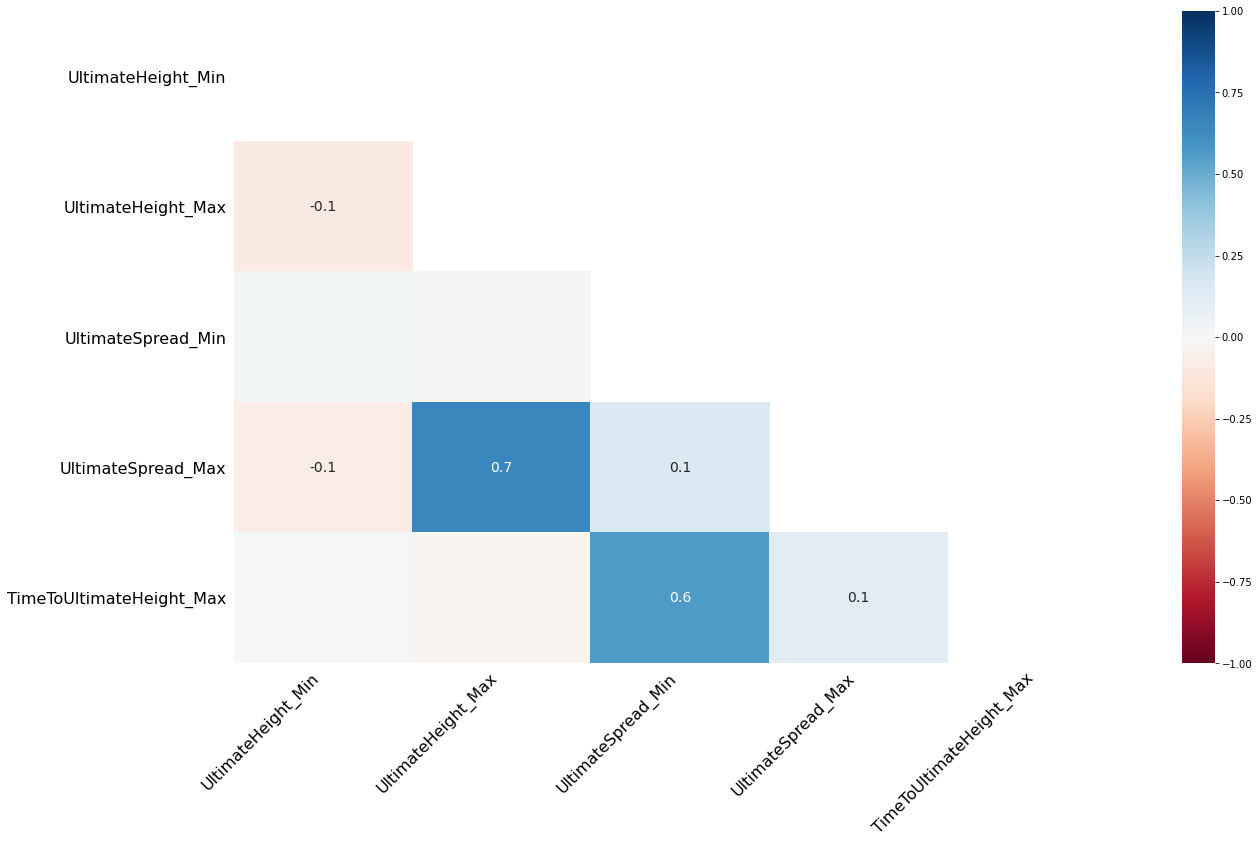

In [24]:
msno.heatmap(numerical_df)

In [25]:
knn_impute = KNNImputer(n_neighbors=3, weights='distance')
knn_arr = knn_impute.fit_transform(numerical_df)
knn_df = pd.DataFrame(data=knn_arr, columns=numerical_df.columns)

nulls = (df["TimeToUltimateHeight_Max"].isnull() | df["UltimateHeight_Max"].isnull())
fig_knn = px.scatter(knn_df, x="TimeToUltimateHeight_Max", y="UltimateHeight_Max", title='Time To Ultimate Height Max',
           color=nulls)
fig_knn

In [26]:
knn_df.isna().sum()

UltimateHeight_Min          0
UltimateHeight_Max          0
UltimateSpread_Min          0
UltimateSpread_Max          0
TimeToUltimateHeight_Max    0
dtype: int64

In [27]:
knn_df.head()

,UltimateHeight_Min,UltimateHeight_Max,UltimateSpread_Min,UltimateSpread_Max,TimeToUltimateHeight_Max
0,1.5,2.5,1.5,2.5,20.0
1,12.0,12.0,4.0,8.0,50.0
2,12.0,12.0,4.0,8.0,50.0
3,12.0,12.0,4.0,8.0,50.0
4,1.0,1.5,1.0,1.5,10.0


In [28]:
knn_df = knn_df.round(decimals=1)

In [29]:
knn_df.to_csv('rhs_cleaned_dataset.csv')